# Time Series Dataset Simulation: Trend, Seasonal, and Calendar Variation Effects

## Create components

### Import packages

In [1]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



### Dummy variable for trend effect

In [2]:
dummyT <- c(1:204)

In [4]:
print(head(dummyT, 10))

 [1]  1  2  3  4  5  6  7  8  9 10


In [6]:
print(tail(dummyT, 10))

 [1] 195 196 197 198 199 200 201 202 203 204


### Dummy variable for seasonal effect (monthly)

In [9]:
Month <- data.frame(Month=rep(1:12,17))
dummyM <- dummy(Month$Month, sep = "_")

In [10]:
print(head(dummyM,10))

      NA_1 NA_2 NA_3 NA_4 NA_5 NA_6 NA_7 NA_8 NA_9 NA_10 NA_11 NA_12
 [1,]    1    0    0    0    0    0    0    0    0     0     0     0
 [2,]    0    1    0    0    0    0    0    0    0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     0
 [4,]    0    0    0    1    0    0    0    0    0     0     0     0
 [5,]    0    0    0    0    1    0    0    0    0     0     0     0
 [6,]    0    0    0    0    0    1    0    0    0     0     0     0
 [7,]    0    0    0    0    0    0    1    0    0     0     0     0
 [8,]    0    0    0    0    0    0    0    1    0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    1     0     0     0
[10,]    0    0    0    0    0    0    0    0    0     1     0     0


### Dummy variable for calendar variation

In [22]:
CalVar<-data.frame(CV=c(rep(0,10),"WB3","W3",rep(0,10),"WB1","W1",rep(0,9),"WB4","W4",
                    rep(0,10),"WB3","W3",rep(0,10),"WB1","W1",rep(0,9),"WB4","W4",
                    rep(0,10),"WB2","W2",rep(0,10),"WB1","W1",rep(0,9),"WB3","W3",
                    rep(0,10),"WB2","W2",rep(0,9),"WB4","W4",rep(0,10),"WB3","W3",
                    rep(0,10),"WB2","W2",rep(0,9),"WB4","W4",rep(0,10),"WB3","W3",
                    rep(0,10),"WB1","W1",rep(0,9),"WB4","W4",rep(0,6)))
dummyCV <- dummy(CalVar$CV, sep = "_")[,-1]

In [23]:
print(head(dummyCV))

     NA_W1 NA_W2 NA_W3 NA_W4 NA_WB1 NA_WB2 NA_WB3 NA_WB4
[1,]     0     0     0     0      0      0      0      0
[2,]     0     0     0     0      0      0      0      0
[3,]     0     0     0     0      0      0      0      0
[4,]     0     0     0     0      0      0      0      0
[5,]     0     0     0     0      0      0      0      0
[6,]     0     0     0     0      0      0      0      0


### Combine dummy variables

In [24]:
Dummy <- cbind(dummyT, dummyM, dummyCV)

### Trend pattern

In [50]:
Ytrend <- as.ts(0.1*dummyT)

### Seasonal pattern

In [26]:
Yseason <- rep(0,204)
for (i in 1:204){
Yseason[i] <- 20*dummyM[i,1]+23*dummyM[i,2]+25*dummyM[i,3]+23*dummyM[i,4]+
              20*dummyM[i,5]+15*dummyM[i,6]+10*dummyM[i,7]+7*dummyM[i,8]+
              5*dummyM[i,9]+7*dummyM[i,10]+10*dummyM[i,11]+15*dummyM[i,12]
}

In [28]:
library(repr)

Warning message:
"package 'repr' was built under R version 3.4.3"

In [40]:
options(repr.plot.width=6, repr.plot.height=4)

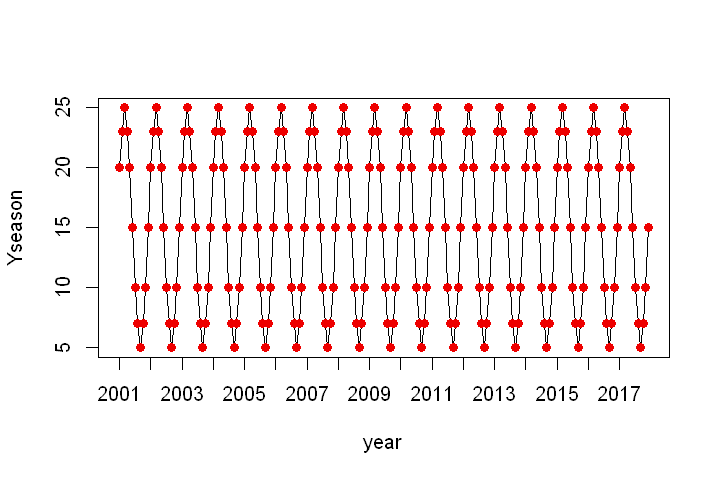

In [41]:
plot(as.ts(Yseason),xlab="year",axes=F,ylab="Yseason")
box()
points(Yseason,pch=19,col="red2")
axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
axis(side=2)

### Calendar Variation Effect

In [34]:
YCV <- rep(0,204)
for (i in 1:204){
YCV[i] <- 23*dummyCV[i,1]+37*dummyCV[i,2]+44*dummyCV[i,3]+48*dummyCV[i,4]+
          56*dummyCV[i,5]+42*dummyCV[i,6]+34*dummyCV[i,7]+30*dummyCV[i,8]
}

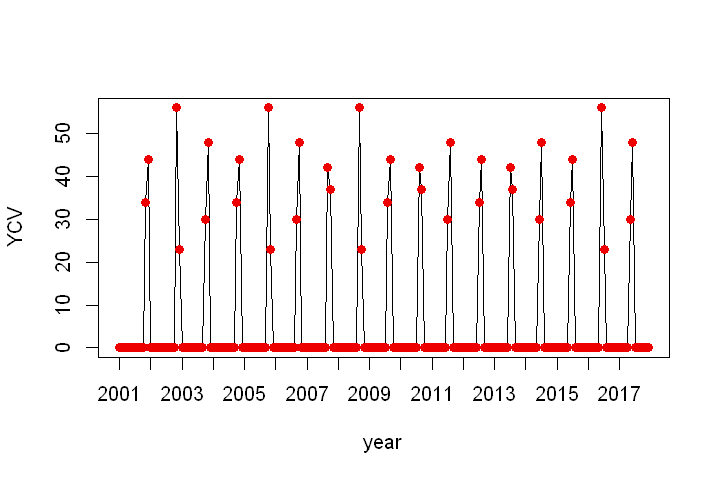

In [42]:
plot(as.ts(YCV),xlab="year",axes=F,ylab="YCV")
box()
points(YCV,pch=19,col="red2")
axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
axis(side=2)

### Noise with linear pattern (AR(1) model)

In [38]:
set.seed(123)
NtLinear <- runif(4000,-1,1)
NtLinear [1] <-0.0
for(i in 2:4000) {
  e <- rnorm(1,sd=0.5)
  NtLinear[i] <- 0.7*NtLinear[i-1]+e 
}
NtLinear <- NtLinear[3797:4000]
NtLinear <- as.ts(NtLinear)

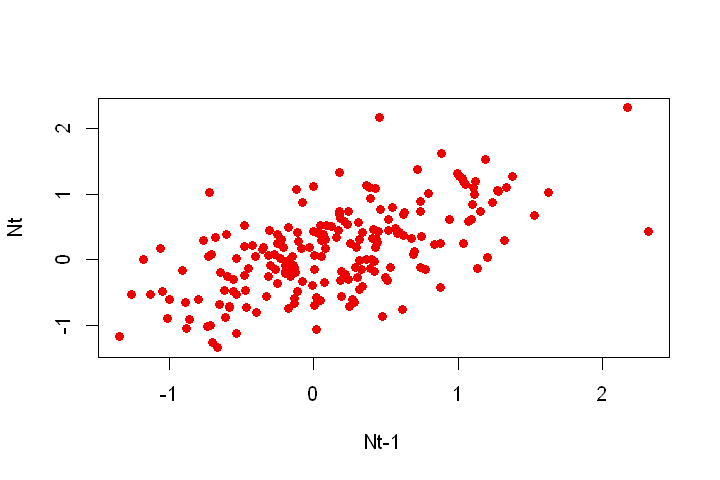

In [43]:
plot(NtLinear[1:203],NtLinear[2:204],xlab="Nt-1",ylab="Nt",pch=19,col="red2")

### Noise with nonlinear pattern (ESTAR(1) model)

In [44]:
set.seed(123)
NtNonlinear <- runif(4000,-1,1)
NtNonlinear[1] <- 0.0
for(i in 2:4000){
  e<-rnorm(1,sd=0.5)
  NtNonlinear[i] <- 6.5*NtNonlinear[i-1]*exp(-0.25*NtNonlinear[i-1]*NtNonlinear[i-1])+e
}
NtNonlinear <- NtNonlinear[3797:4000]
NtNonlinear <- as.ts(NtNonlinear)

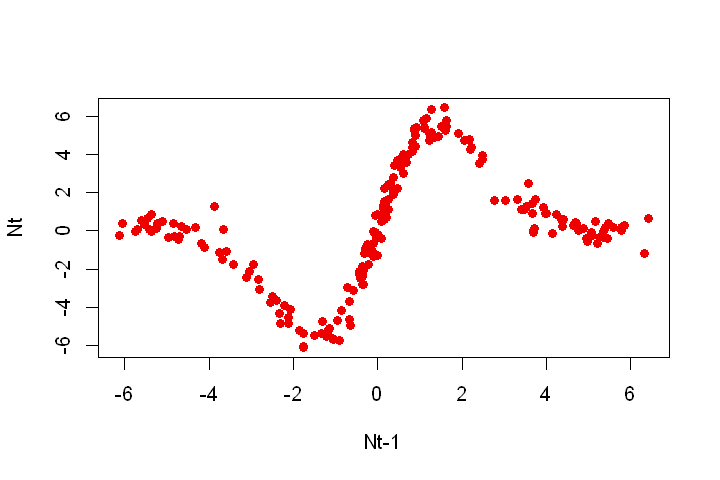

In [46]:
plot(NtNonlinear[1:203],NtNonlinear[2:204],xlab="Nt-1",ylab="Nt",pch=19,col="red2")

In [52]:
#SCENARIO_1 (HOMOGEN SEASONAL WITH LINEAR NOISE)
Y1 = Ytrend + Yseason + YCV + NtLinear

#SCENARIO_2 (HOMOGEN SEASONAL WITH NONLINEAR NOISE)
Y2 = Ytrend + Yseason + YCV + NtNonlinear

In [ ]:
#SCENARIO_1 (HOMOGEN SEASONAL WITH LINEAR NOISE)
Yt_1=Y.trend+Y.seas.1+Y.CV+Nt_Linear

#SCENARIO_2 (HOMOGEN SEASONAL WITH NONLINEAR NOISE)
Yt_2=Y.trend+Y.seas.1+Y.CV+Nt_Nonlinear

par(mfrow=c(1,2))
plot(Yt_1,xlab="Year",axes=F,ylab="Yt_1")
  box()
  points(Yt_1,pch=19,col="red2")
  axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
  axis(side=2)

plot(Yt_2,xlab="Year",axes=F,ylab="Yt_2")
  box()
  points(Yt_2,pch=19,col="red2")
  axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
  axis(side=2)

data=cbind(Yt_1,Yt_2,Dummy.T,Dummy.M,Dummy.CV)
write.table(data,"simulation_data.txt",dec=",",sep="\t",col.names=TRUE)



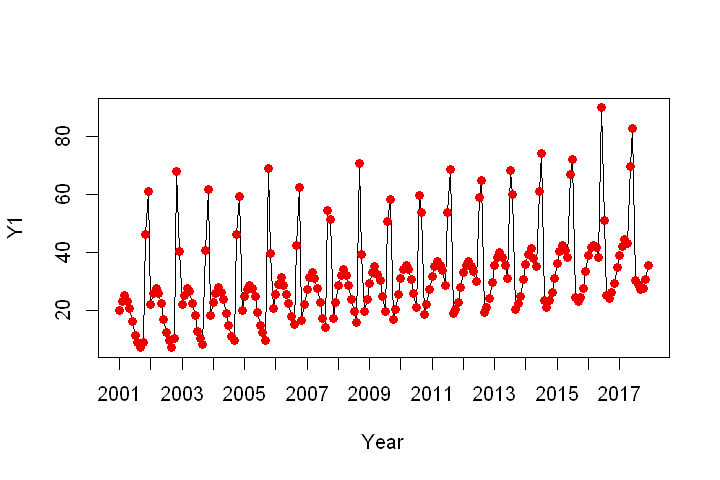

In [54]:
plot(Y1,xlab="Year",axes=F,ylab="Y1")
box()
points(Y1,pch=19,col="red2")
axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
axis(side=2)

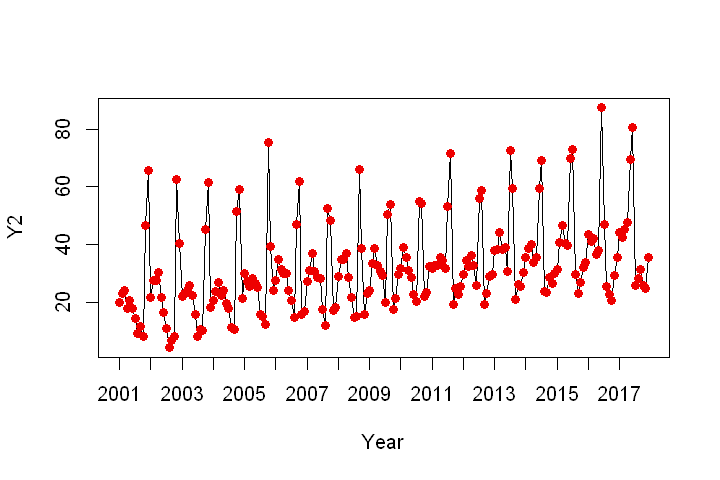

In [55]:
plot(Y2,xlab="Year",axes=F,ylab="Y2")
box()
points(Y2,pch=19,col="red2")
axis(side=1,at=seq(1,204,12),labels=c(2001:2017))
axis(side=2)

In [57]:
write.csv(Y1, "data_linear.csv")

In [58]:
write.csv(Y2, "data_nonlinear.csv")